In [1]:
%run '../ipython_startup.py'

Importing commonly used libraries: os, sys, numpy as np, scipy as sp, pandas as pd, matplotlib as mp, matplotlib.pyplot as plt, datetime as dt, mclib_Python/flagging as fg
Creating project level variables: MCLAB = /home/jfear/mclab, PROJ = /home/jfear/mclab/cegs_ase_paper, TODAY = 20150813
Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH


In [2]:
from sas7bdat import SAS7BDAT

In [4]:
# Read in clean data set
with SAS7BDAT(os.path.join(PROJ, 'sas_data/clean_ase_sbs.sas7bdat')) as FH:
    df = FH.to_data_frame()

[clean_ase_sbs.sas7bdat] header length 65536 != 8192


# All Estimates

In [18]:
dfM = pd.pivot_table(df, values='q5_mean_theta_m', columns='line', index='fusion_id') 
dfV = pd.pivot_table(df, values='q5_mean_theta_v', columns='line', index='fusion_id') 

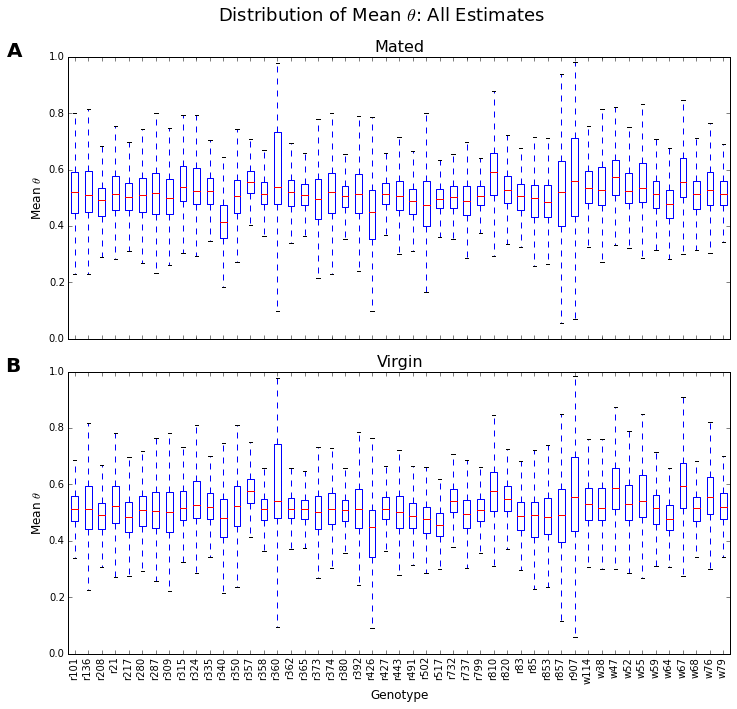

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle(r'Distribution of Mean $\theta$: All Estimates', fontsize=18)
dfM.plot(kind='box', ax=ax1, rot=90, sym='', title='Mated', grid=False)
dfV.plot(kind='box', ax=ax2, rot=90, sym='', title='Virgin', grid=False)

ax1.title.set_fontsize(16)
ax1.set_ylabel(r'Mean $\theta$', fontsize=12)

ax2.title.set_fontsize(16)
ax2.set_ylabel(r'Mean $\theta$', fontsize=12)
ax2.set_xlabel('Genotype', fontsize=12)

ax1.text(-4, 1, 'A', fontsize=20, fontweight='bold')
ax2.text(-4, 1, 'B', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, .95])
plt.savefig(os.path.join(PROJ, 'pipeline_output/ase_summary/boxplot_distribution_ai_by_genotype_all_estimates.png'), bbox_inches='tight', dpi=120)

# Significant only

In [100]:
dfMsig = pd.pivot_table(df[df['flag_AI_combined_m'] == 1], values='q5_mean_theta_m', columns='line', index='fusion_id') 
dfVsig = pd.pivot_table(df[df['flag_AI_combined_v'] == 1], values='q5_mean_theta_v', columns='line', index='fusion_id') 

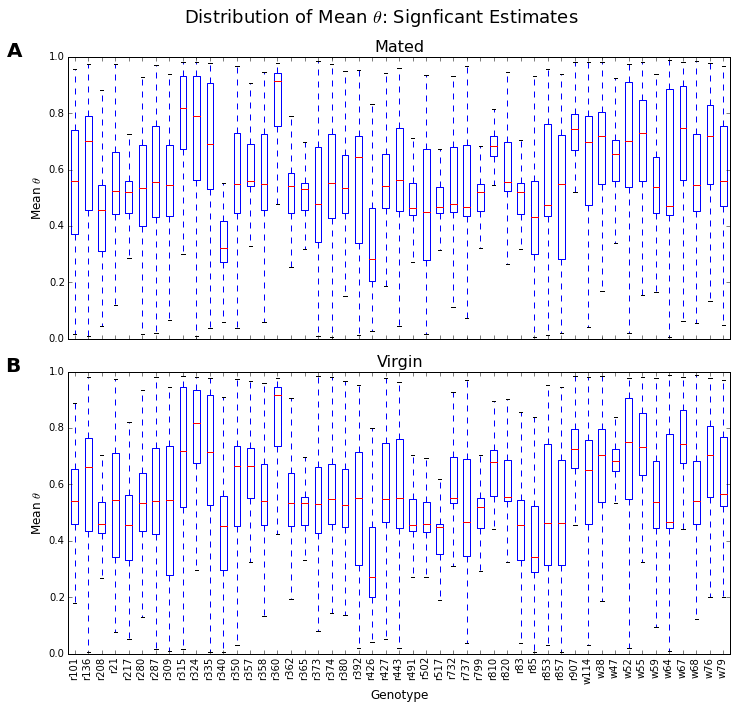

In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle(r'Distribution of Mean $\theta$: Signficant Estimates', fontsize=18)
dfMsig.plot(kind='box', ax=ax1, rot=90, sym='', title='Mated', grid=False)
dfVsig.plot(kind='box', ax=ax2, rot=90, sym='', title='Virgin', grid=False)

ax1.title.set_fontsize(16)
ax1.set_ylabel(r'Mean $\theta$', fontsize=12)

ax2.title.set_fontsize(16)
ax2.set_ylabel(r'Mean $\theta$', fontsize=12)
ax2.set_xlabel('Genotype', fontsize=12)

ax1.text(-4, 1, 'A', fontsize=20, fontweight='bold')
ax2.text(-4, 1, 'B', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, .95])
plt.savefig(os.path.join(PROJ, 'pipeline_output/ase_summary/boxplot_distribution_ai_by_genotype_significant_estimates.png'), bbox_inches='tight', dpi=120)